# Barrier gate:

    - Non-unitary operation
    - Better visualization

### Informs the transpiler not to combine the gates

## Another use of barrier during the tranpile process

### Transpile: https://qiskit.org/documentation/apidoc/transpiler.html

- In other words, transpile makes the given circuit compatible with the backend circuit layout by using their respective basis gates.


NOTE: Only for testing purposes we will use the mock backends
<a href="./Mock_backends_Testing.ipynb">Refer</a>

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,transpile
from qiskit.test.mock import FakeVigo,FakeLondon

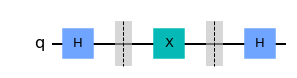

In [2]:
qc=QuantumCircuit(1)
qc.h(0)
qc.barrier(0)
qc.x(0)
qc.barrier(0)
qc.h(0)

qc.draw(output="mpl")

### NOTE:

    - In the following example for a given backend
    - Transpile: The entire given circuit gets rewired to the available basis gates of  
       the selected backend(i.e in our case backend= fake_vigo
    - In the given backend ,H is transpiled into Rz-sqrt(X)-Rz
    - Since there is a barrrier present we can see the gates are not combined by the   
      compiler

In [3]:
device_backend = FakeVigo()

In [4]:
config_details = device_backend.configuration()

In [5]:
config_details.backend_name

'fake_vigo'

In [6]:
config_details.n_qubits

5

In [7]:
config_details.basis_gates

['id', 'rz', 'sx', 'x', 'cx']

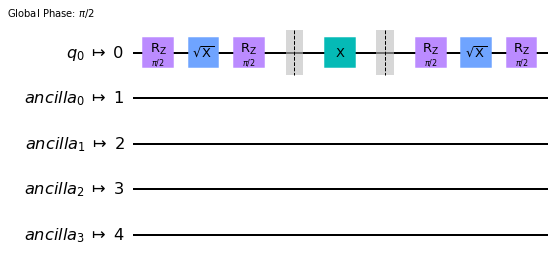

In [8]:
qc_transpile=transpile(qc,device_backend)
qc_transpile.draw(output="mpl")

NOTE:

    Now let's see if we remove the barrier

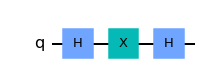

In [9]:
qc=QuantumCircuit(1)
qc.h(0)
qc.x(0)
qc.h(0)

qc.draw(output="mpl")

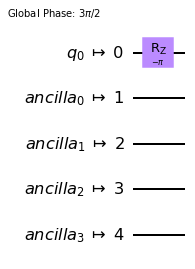

In [10]:
qc_transpile=transpile(qc,device_backend)
qc_transpile.draw(output="mpl")

### Output: 
    
    - Now we observe the H-X-H are combined by the compiler for the selected backend
    - HXH equivalent is Rz which have been rewired for the available basis gates of 
      the fake_vigo backend
    

### Let's take another backend to understand better , backend with <= 5 qubits and corresponding their basis gates

In [11]:
device_backend = FakeLondon()

In [12]:
config_details = device_backend.configuration()

In [13]:
config_details.backend_name

'fake_london'

In [14]:
config_details.n_qubits

5

In [15]:
config_details.basis_gates

['id', 'u1', 'u2', 'u3', 'cx']

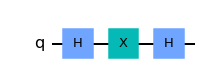

In [16]:
qc=QuantumCircuit(1)
qc.h(0)
qc.x(0)
qc.h(0)

qc.draw(output="mpl")

### NOTE:
    IN this backend, depending on the basis gates, all the 3 gates are compiled 
    together

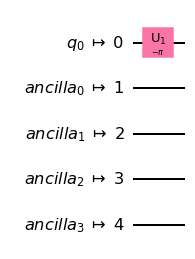

In [17]:
qc_transpile=transpile(qc,device_backend)
qc_transpile.draw(output="mpl")

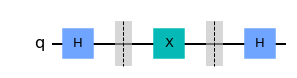

In [18]:
qc=QuantumCircuit(1)
qc.h(0)
qc.barrier(0)
qc.x(0)
qc.barrier(0)
qc.h(0)

qc.draw(output="mpl")

### Note:
    - After the barrier has been added, each gate is transpiled/hard-wired separately
    - H-------> u2(0,pi)
    - X-------> u3(pi,0,pi)

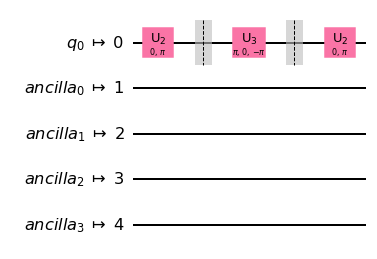

In [19]:
qc_transpile=transpile(qc,device_backend)
qc_transpile.draw(output="mpl")

# Conclusion: Barrier not only visually separates the gates in the circuit but also during the transpilation